# How to do stuff in Jupyter-Books

## Images

### Data plotting

NameError: name 'df_sample' is not defined

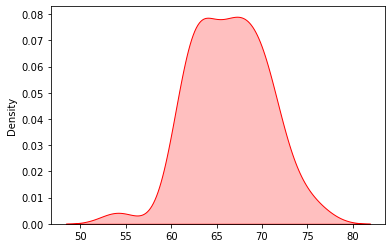

In [1]:
#required import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

##Machine Learning for Hackers, Drew Conway & John Myles-While, O'Reilly Media.
url = "https://raw.githubusercontent.com/johnmyleswhite/ML_for_Hackers/master/02-Exploration/data/01_heights_weights_genders.csv"
df = pd.read_csv(url)
dfht = df[['Height']]

# Plot
pop_ht = np.random.normal(size=50,loc=66.36756, scale=3.84) #a normal dist adj to Mean and Std

fig, ax = plt.subplots();
sns.kdeplot(pop_ht,color="r", shade = True, label="Adults heights");
sns.histplot(df_sample, x = 'Height', stat = 'probability', kde = True, color="dodgerblue", label="Sample Men heights",bins = 6); 

plt.axvline(x=68.929605, color='b', dashes=(3, 3), zorder=0,linewidth=1);
plt.axvline(x=66.367560, color='red', dashes=(3, 3), zorder=0,linewidth=1);
plt.xlim(55,80)
plt.ylim(0,.38)
plt.legend();

### Dataframe displays

In [ ]:
#required import
import pandas as pd

##Machine Learning for Hackers, Drew Conway & John Myles-While, O'Reilly Media.
url = "https://raw.githubusercontent.com/johnmyleswhite/ML_for_Hackers/master/02-Exploration/data/01_heights_weights_genders.csv"
df = pd.read_csv(url)

In [20]:
##standard display. 
display(df)

#set degault max and options
df_sample = df.loc[df['Gender']== 'Male',['Gender','Height']].sample(50, random_state=12, ignore_index=True);
pd.set_option('display.max_rows', 30)
display(df_sample)

#set scoll options in metdata. only displays in html output

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


,Gender,Height
0,Male,63.651508
1,Male,72.390657
2,Male,69.008259
3,Male,71.357382
4,Male,70.490929
...,...,...
45,Male,73.847017
46,Male,69.624550
47,Male,69.481714
48,Male,67.459715


To display htmls outputs in scroll box, hidden box, etc., add metadata tags:

<code>{
    "tags": [
        "output_scroll",
        "hide_input"
    ]
}<code>
    
Using Lab or Notebook metadata edit options

#### Display dataframes side by side

### Figure layouts

In [22]:
#required import
import pandas as pd
from IPython.display import display, display_html

url = "https://raw.githubusercontent.com/johnmyleswhite/ML_for_Hackers/master/02-Exploration/data/01_heights_weights_genders.csv"
df = pd.read_csv(url)
dfht = df[['Height']]

#display stats side by side
df1_styler = df_sample.describe().loc[['mean','std']].style.set_table_attributes("style='display:inline'").set_caption('Sample Heights of 50 Adult Males')
df2_styler = dfht.describe().loc[['mean','std']].style.set_table_attributes("style='display:inline'").set_caption('Population of Adult Heights')
space = "\xa0" * 10 #adjusts spacing

display_html(df1_styler._repr_html_()+ space +df2_styler._repr_html_(), raw=True)

,Height
mean,68.929605
std,3.028708
,Height
mean,66.367560
std,3.847528


#### Figure Captioning

##### Captioning Matplot and Boxed images
This is a hack. Adding captions to saved images seems easy, but labeling, indexing, and captioning generated and Boxed images does not seem to be yet supported. Add the following as **Markdown** below the figure:

In [ ]:
```{figure} data:image/gif;base64,R0lGODlhAQABAIAAAAAAAP///yH5BAEAAAAALAAAAAABAAEAAAIBRAA7
:figclass: caption-hack
:name: your-fig-name

Your caption goes here
```

Add the following to the CSS file. For Jupyter-books, it should be added to "bookfolder/_static/css_file.css" The Css mode is necessary to center the image output so it aligns with the captioning. This is not ideal as it applies to all images. 

<code> img {
    display: block;
    margin-left: auto;
    margin-right: auto;
}<code>

<code>.caption-hack img {
    margin-bottom: -28px;
}<code>

##### Capstioning with glue